# RGB-based 3D Reconstruction using Stereo image

## Import

In [13]:
import numpy as np
import open3d as o3d
import plotly.graph_objects as go
import cv2
import matplotlib.pyplot as plt
from PIL import Image

## Load stereo images

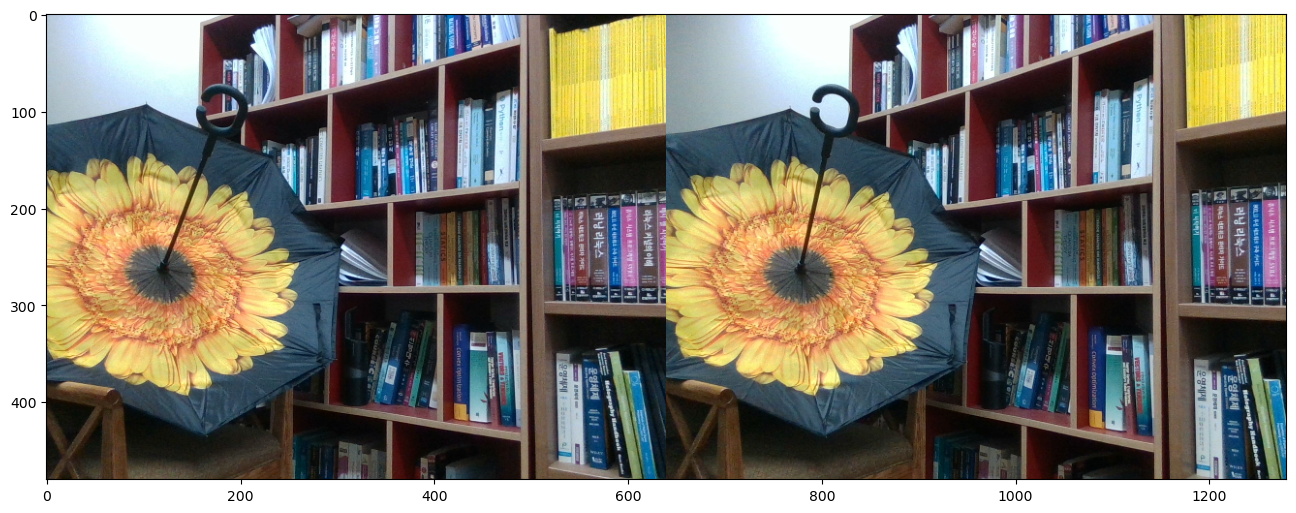

In [18]:
rgb_left = cv2.imread('left.png', 1)
rgb_right = cv2.imread('right.png', 1)

img_concat = cv2.hconcat([rgb_left, rgb_right])
plt.figure(figsize=(16, 12))
plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))

h, w, ch = rgb_left.shape

## Set Camera Intrinsic parameter

In [19]:
f_x = 618.212
f_y = 617.673
c_x = 323.716
c_y = 256.977
k1 = 0
k2 = 0

K = np.array([[f_x, 0, c_x], [0, f_y, c_y], [0, 0, 1]], dtype=np.float64)
dist = np.array([[0, 0, 0, 0, 0]], dtype=np.float64)

print(K)
print(dist)

[[618.212   0.    323.716]
 [  0.    617.673 256.977]
 [  0.      0.      1.   ]]
[[0. 0. 0. 0. 0.]]


## Undistortion

In [16]:
newcameramtx, roi = cv2.getOptimalNewCameraMatrix(K, dist, (w, h), 1, (w, h))

In [17]:
# Undistort
import cv2
dst = cv2.undistort(rgb_left, K, dist, None, newcameramtx)

# Crop the image
x, y, w, h = roi
dst = dst[y:y+h, x:x+w]

plt.figure(figsize=(16,12))
plt.

SyntaxError: invalid syntax (1508981819.py, line 4)

## Feature matching

In [ ]:
img1 = rgb_left
img2 = rgb_right

sift = cv2.SIFT_create()

# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1, None)
kp2, des2 = sift.detectAndCompute(img2, None)

nkp1 = []
ndesc1 = []
nkp2 = []
ndesc2 = []
pts1 = []
pts2 = []
good = []
kkp1 = []
kkp2 = []

print(w)
print(h)

# Mission.2 -------------------
# 여기에서는 min, max x,y 가 필요하지 않습니다.
# 적당한 값(이미지 사이즈를 고려하여)으로 설정해주세요

max_x1 = 0
min_x1 = 0
max_y1 = 0
min_y1 = 0
# -----------------------------

for i in range(len(kp1)):
  if kp1[i].pt[0] < max_x1 and kp1[i].pt[0] > min_x1 and kp1[i].pt[1] < max_y1 and kp1[i].pt[1] > min_y1:
    nkp1.append(kp1[i])
    ndesc1.append(des1[i])

for i in range(len(kp2)):
  if kp2[i].pt[0] < max_x1 and kp2[i].pt[0] > min_x1 and kp2[i].pt[1] < max_y1 and kp2[i].pt[1] > min_y1:
    nkp2.append(kp2[i])
    ndesc2.append(des2[i])

nkp1 = tuple(nkp1)
nkp2 = tuple(nkp2)
ndesc1 = tuple(ndesc1)
ndesc2 = tuple(ndesc2)

# FLANN parameters
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=100)
flann = cv2.FlannBasedMatcher(index_params,search_params)
matches = flann.knnMatch(np.asarray(ndesc1,np.float32), np.asarray(ndesc2,np.float32), k=2)
for i,(m,n) in enumerate(matches):
    if m.distance < 0.75*n.distance:
      pts1.append(nkp1[m.queryIdx].pt)
      pts2.append(nkp2[m.trainIdx].pt)
      kkp1.append(nkp1[m.queryIdx])
      kkp2.append(nkp2[m.trainIdx])
      good.append([m])

img_k1 = img1.copy()
cv2.drawKeypoints(img_k1,kkp1,img_k1,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
img_k2 = img2.copy()
cv2.drawKeypoints(img_k2,kkp2,img_k2,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
cv2_imshow(cv2.hconcat([img_k1, img_k2]))

res = cv2.hconcat([img_k1, img_k2])
for i in range(len(pts1)):
  cv2.line(res, (int(pts1[i][0]), int(pts1[i][1])), (int(pts2[i][0])+w, int(pts2[i][1])), (0, 255, 255), 1, 4 )

cv2_imshow(res)

Compute Essential Matrix

In [ ]:
pts1 = np.int32(pts1)
pts2 = np.int32(pts2)


p1, p2 = np.ascontiguousarray(pts1, np.float32), np.ascontiguousarray(pts2, np.float32)

#  Mission.3 : normalized points를 구하고 essential matrix를 구하세요 (undistortPoints, findEssentialMat 사용)
# 수업 자료를 참조하세요


E = E / E[2,2]

print('Essential Matrix')
print(E)


Get Rotation, translation

In [ ]:
# Mission.4: Essential matrix로부터 pose를 구하세요

points, R_est, t_est, mask_pose = 

print('Rotation')
print(R_est)
print('translation')
print(t_est)

Stereo Rectification

In [ ]:
# Mission.5 3D Reconstruction을 수행하세요
# 수업자료에 소스코드가 있습니다.

Stereo matching

In [ ]:
# Mission 6. Grayscale로 변환한 후 stereo matching을 수행하세요
# 수업자료에 소스코드가 있습니다.
# 수업자료의 소스코드에는 수정할 부분이 있습니다. 결과가 잘 나오도록, 변수값 하나를 조절하세요


3D Reconstruction

In [ ]:
colors = []
points = []

f_x = K[0,0]
f_y = K[1,1]
c_x = K[0,2]
c_y = K[1,2]
# target distance unit: meter
Z = 1.0 

sampling_rate = 1

for v in range(0,h,sampling_rate):
  for u in range(0,w,sampling_rate):
    if disparity[v,u] < 0:
      continue
    color = img1_rect[int(v),int(u),:]
    if color[2] == 0 and color[1]==0 and color[0] == 0:
      continue
    Z = -T[0,0] * K[0,0] / disparity[v,u]
    if Z < 0 or Z > 10:
      continue
    X = (u - c_x) * Z / f_x
    Y = (v - c_y) * Z / f_y
    points.append([X,Y,Z])
    colors.append([color[2]/255.0,color[1]/255.0,color[0]/255.0])

points=np.array(points)
colors=np.array(colors)

print(type(points))
print(points.shape)

# Convert to Open3D.PointCLoud:
pcd_o3d = o3d.geometry.PointCloud()  # create a point cloud object
pcd_o3d.points = o3d.utility.Vector3dVector(points)
pcd_o3d.colors=o3d.utility.Vector3dVector(colors)

In [ ]:
def draw_geometries(geometries):
    graph_objects = []

    for geometry in geometries:
        geometry_type = geometry.get_geometry_type()
        
        if geometry_type == o3d.geometry.Geometry.Type.PointCloud:
            points = np.asarray(geometry.points)
            colors = None
            if geometry.has_colors():
                colors = np.asarray(geometry.colors)
            elif geometry.has_normals():
                colors = (0.5, 0.5, 0.5) + np.asarray(geometry.normals) * 0.5
            else:
                geometry.paint_uniform_color((1.0, 0.0, 0.0))
                colors = np.asarray(geometry.colors)

            scatter_3d = go.Scatter3d(x=points[:,0], y=points[:,1], z=points[:,2], mode='markers', marker=dict(size=1, color=colors))
            graph_objects.append(scatter_3d)

        if geometry_type == o3d.geometry.Geometry.Type.TriangleMesh:
            triangles = np.asarray(geometry.triangles)
            vertices = np.asarray(geometry.vertices)
            colors = None
            if geometry.has_triangle_normals():
                colors = (0.5, 0.5, 0.5) + np.asarray(geometry.triangle_normals) * 0.5
                colors = tuple(map(tuple, colors))
            else:
                colors = (1.0, 0.0, 0.0)
            
            mesh_3d = go.Mesh3d(x=vertices[:,0], y=vertices[:,1], z=vertices[:,2], i=triangles[:,0], j=triangles[:,1], k=triangles[:,2], facecolor=colors, opacity=0.50)
            graph_objects.append(mesh_3d)
        
    fig = go.Figure(
        data=graph_objects,
        layout=dict(
            scene=dict(
                xaxis=dict(visible=False),
                yaxis=dict(visible=False),
                zaxis=dict(visible=False)
            )
        )
    )
    fig.show()
o3d.visualization.draw_geometries = draw_geometries # replace function

Visualization & Save Point Clouds

In [ ]:
o3d.visualization.draw_geometries([pcd_o3d])

o3d.io.write_point_cloud('recon_rgb.ply', pcd_o3d)